<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/Clustering_and_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [2]:
df_cust=pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
df_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
len(df_cust)

2240

In [5]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df_cust=df_cust.dropna()

In [7]:
len(df_cust)

2216

In [8]:
df_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [9]:
df_cust['Dt_Customer']=pd.to_datetime(df_cust['Dt_Customer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [11]:
dates=[]
for i in df_cust['Dt_Customer']:
    i=i.date()
    dates.append(i)
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [12]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df_cust["Customer_For"] = days
df_cust["Customer_For"] = pd.to_numeric(df_cust["Customer_For"], errors="coerce")

In [13]:
print("Total categories in the feature Marital_Status:\n",df_cust['Marital_Status'].value_counts(),'\n')
print("Total catgories in the feature Education:\n",df_cust['Education'].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total catgories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
To get further clarity of household, 

Creating feature indicating "Family_Size"
Create a feature "Is_Parent" to indicate parenthood status

Lastly, I will create three categories in the "Education" by simplifying its value counts.
Dropping some of the redundant features

In [14]:
#AGE OF THAT CUSTOMER
df_cust['Age']=2021-df_cust['Year_Birth']

#TOTAL SPENDINGS ON VARIOUS ITEMS
df_cust['Spent']=df_cust['MntWines']+df_cust['MntFruits']+df_cust['MntMeatProducts']+df_cust['MntSweetProducts']+df_cust['MntFishProducts']

#DERIVING LIVING SITUATION BY MARITAL STATUS ALONE
df_cust['Living_With']=df_cust['Marital_Status'].replace({"Married":"Partner","Together":"Partner","Absurd":"Alone","Widow":"Alone","YOLO":"Alone","Divorced":"Alone","Single":"Alone"})

#Feature indicating total children living in the house
df_cust["Children"]=df_cust['Kidhome']+df_cust['Teenhome']

#Feature for total members in the household
df_cust['Family_Size']=df_cust['Living_With'].replace({"Alone":1,"Partner":2})+df_cust['Children']

#Segmenting education levels in three group
df_cust['Education']=df_cust['Education'].replace({"Basic":"Undergraduate","2nd Cycle":"Undergraduate","Graduation":"Graduate","Master":"Postgraduate","PhD":"Postgraduate"})

#For clarity
df_cust=df_cust.rename(columns={"MntWines":"Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop=['Marital_Status',"Dt_Customer","Z_CostContact","Z_Revenue","Year_Birth","ID"]

df_cust=df_cust.drop(to_drop,axis=1)

In [15]:
df_cust

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,64,1529,Alone,0,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,67,21,Alone,2,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,56,734,Partner,0,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,37,48,Partner,1,3
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,40,407,Partner,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,54,1094,Partner,1,3
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,75,436,Partner,3,5
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,40,1217,Alone,0,1
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,65,782,Partner,1,3


In [16]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [17]:
df_cust.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,563.110108,0.947202,2.592509
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,577.183371,0.749062,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,4.000000,0.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,55.000000,0.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,342.500000,1.000000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,964.000000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2491.000000,3.000000,5.000000


In [18]:
df_cust["Is_Parent"] = np.where(df_cust.Children> 0, 1, 0)

Relative Plot of Some Selected Features


<Figure size 432x288 with 0 Axes>

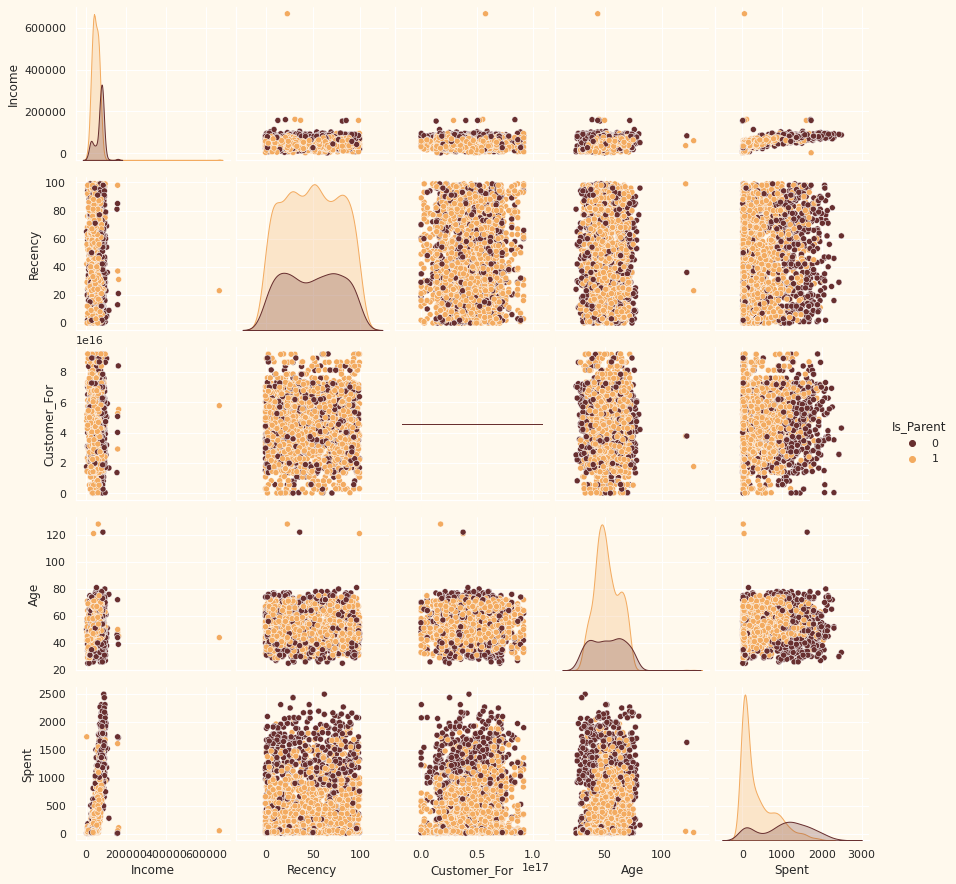

In [19]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting following features
To_plot=["Income","Recency","Customer_For","Age","Spent","Is_Parent"]
print("Relative Plot of Some Selected Features")
plt.figure()
sns.pairplot(df_cust[To_plot],hue='Is_Parent',palette=(['#682F2F','#F3AB60']))
plt.show()

In [20]:
df_cust=df_cust[(df_cust["Age"]<90)]
df_cust=df_cust[(df_cust['Income']<600000)]
print("The total number of data-points after removing the outliers are:", len(df_cust))

The total number of data-points after removing the outliers are: 2212


In [21]:
df_cust.shape

(2212, 30)

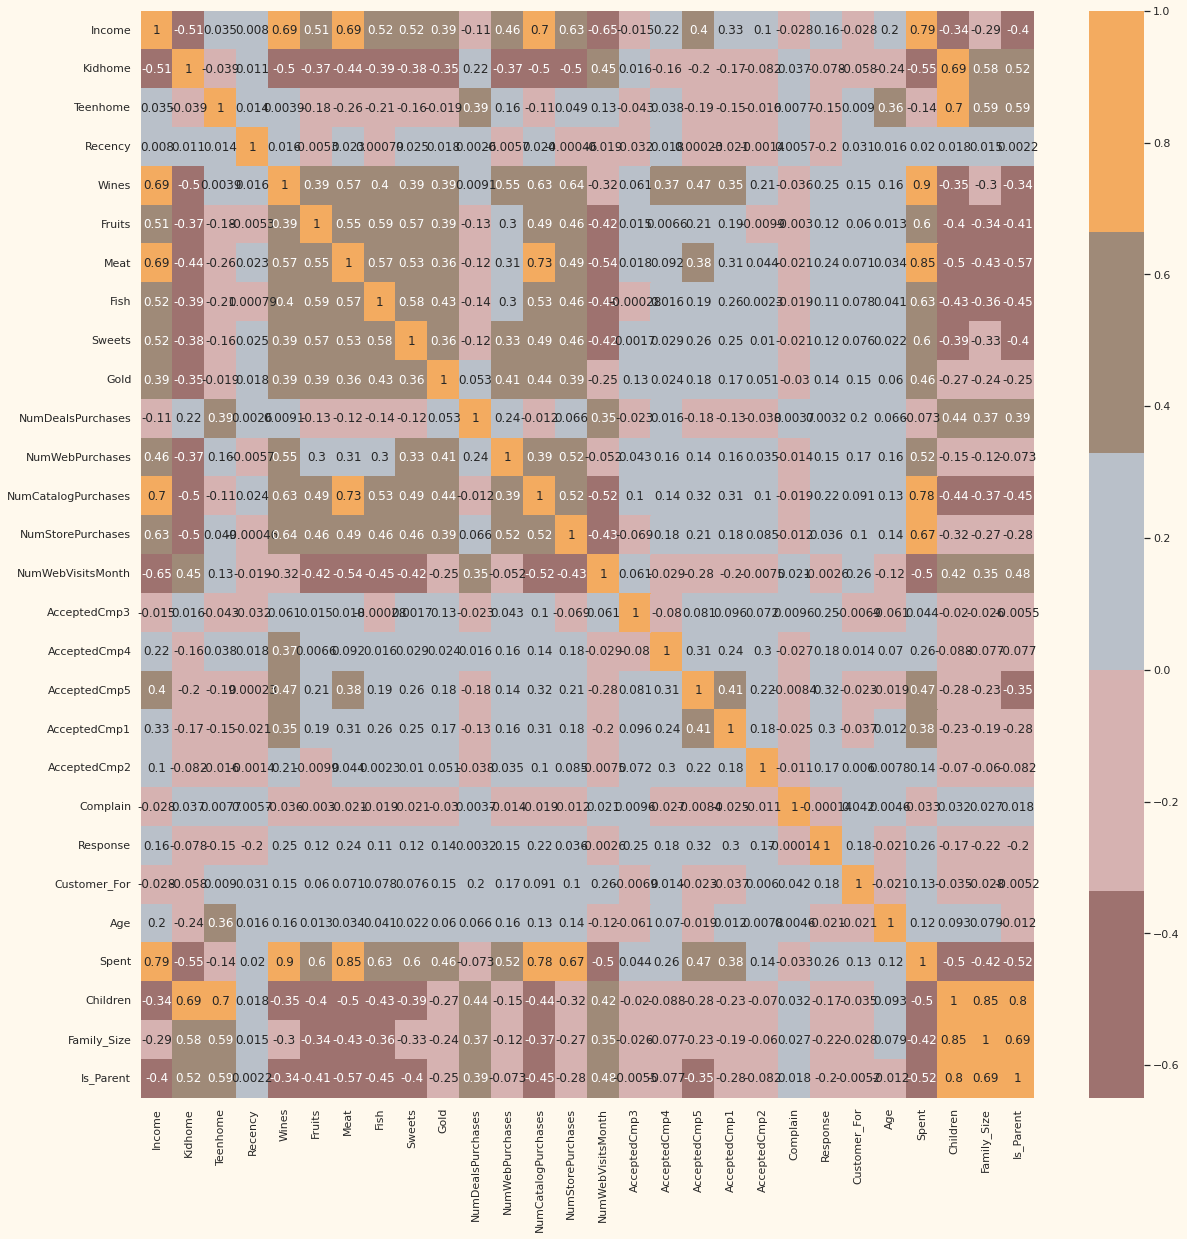

In [22]:
corrmat= df_cust.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

n this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction

In [26]:
s=(df_cust.dtypes==object)
data_cols=list(s[s].index)

print("Categorical variables in the dataset:",data_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [30]:
LE=LabelEncoder()
for i in data_cols:
    df_cust[i]=df_cust[[i]].apply(LE.fit_transform)
print("All features are now numerical")

All features are now numerical


In [33]:
#Creating a copy of data
ds=df_cust.copy()

#creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']
ds=ds.drop(cols_del,axis=1)

#Scaling
scaler=StandardScaler()
scaler.fit(ds)
scaled_ds=pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print('All features are now scaled')

All features are now scaled


In [34]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.507308,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.674153,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.507308,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.940254,-1.349603,1.404572,0.449070,0.632456
2,-0.507308,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.295868,0.740959,-1.264598,-0.654644,-1.581139
3,-0.507308,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.893444,0.740959,0.069987,0.449070,0.632456
4,0.979003,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.271049,0.740959,0.069987,0.449070,0.632456


In [35]:
#Initiating PCA to reduce dimentions aka features to 3
pca=PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds=pd.DataFrame(pca.transform(scaled_ds),columns=(['col1','col2','col3']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,5.119473e-17,2.875516,-5.971933,-2.530365,-0.779156,2.371865,7.447077
col2,2212.0,1.257784e-16,1.704142,-4.230190,-1.324522,-0.165177,1.236425,6.183528
col3,2212.0,8.557551e-18,1.225765,-3.699138,-0.810398,-0.013348,0.801072,6.433678


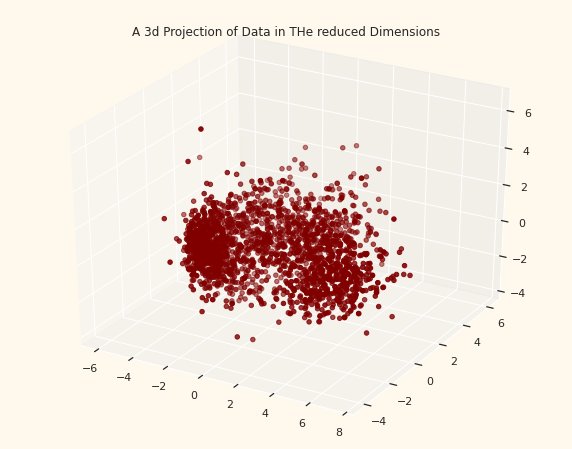

In [36]:
x=PCA_ds['col1']
y=PCA_ds['col2']
z=PCA_ds['col3']

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='maroon',marker='o')
ax.set_title('A 3d Projection of Data in THe reduced Dimensions')
plt.show()

Elbow Method to determine the number of clusteres to be formed


AttributeError: ignored

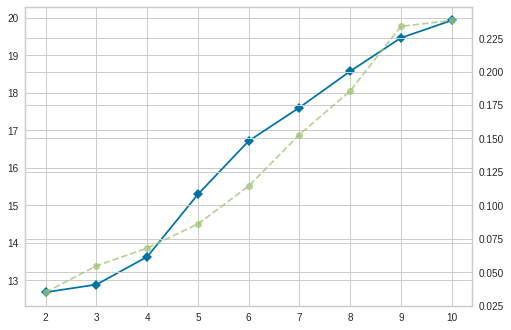

In [40]:
print("Elbow Method to determine the number of clusteres to be formed")
from yellowbrick.cluster import KElbowVisualizer
Elbow_m=KElbowVisualizer(KMeans(),k=10)
Elbow_m.fit(PCA_ds)
Elbow_m.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=4)
y_hat_AC=AC.fit_predict(PCA_ds)
PCA_ds['CLusters']=y_hat_AC
df_cust['CLusters']=y_hat_AC

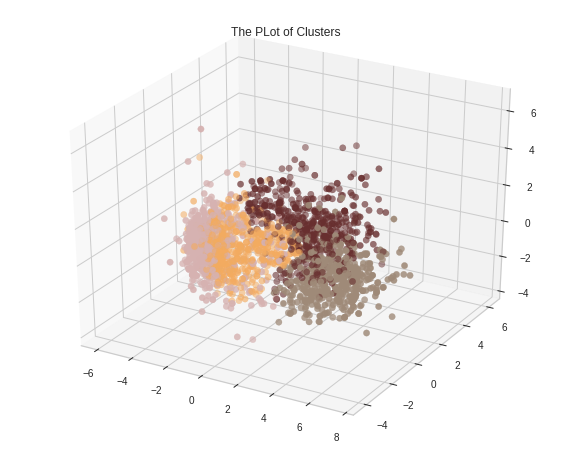

In [48]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=PCA_ds['CLusters'],marker='o',cmap=cmap)
ax.set_title("The PLot of Clusters")
plt.show()

In [69]:
from sklearn.cluster import DBSCAN
cluster_db=DBSCAN(eps=3,min_samples=5).fit_predict(PCA_ds.iloc[:,0:3])
PCA_ds['C_DB']=cluster_db
df_cust['C_DB']=cluster_db

In [70]:
PCA_ds['C_DB'][0],PCA_ds['CLusters'][0]

(0, 2)

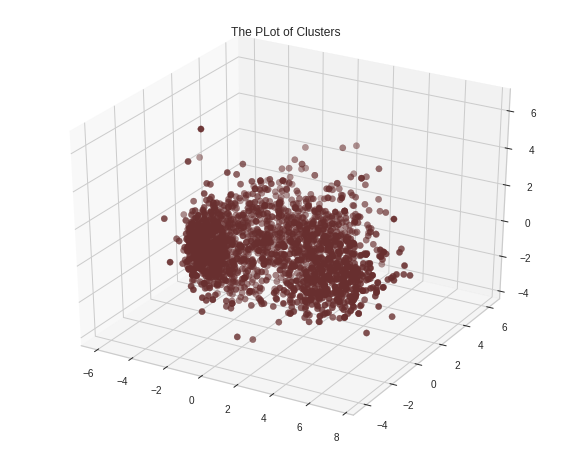

In [71]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=PCA_ds['C_DB'],marker='o',cmap=cmap)
ax.set_title("The PLot of Clusters")
plt.show()

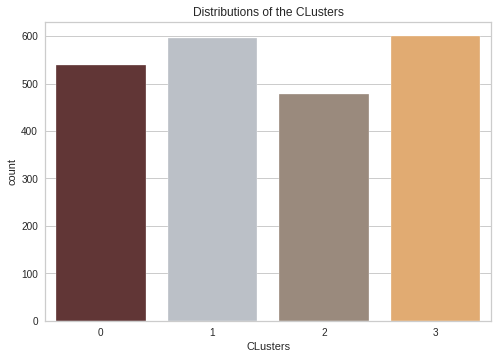

In [72]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.countplot(x=df_cust['CLusters'],palette=pal)
pl.set_title('Distributions of the CLusters')
plt.show()

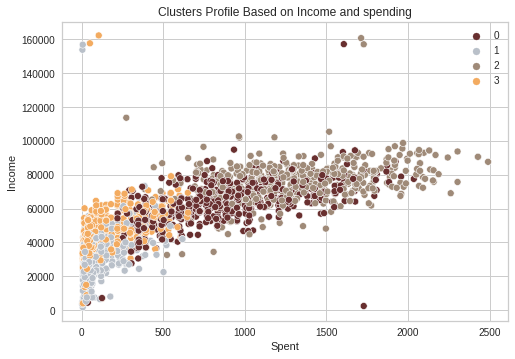

In [73]:
pl=sns.scatterplot(data=df_cust,x=df_cust["Spent"],y=df_cust['Income'],hue=df_cust["CLusters"],palette=pal)
pl.set_title('Clusters Profile Based on Income and spending')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


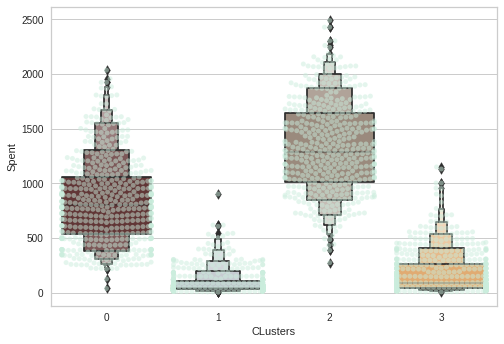

In [76]:
plt.figure()
pl=sns.swarmplot(x=df_cust["CLusters"], y=df_cust["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_cust["CLusters"], y=df_cust["Spent"], palette=pal)
plt.show()

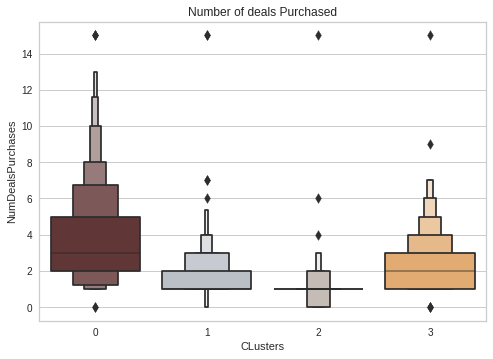

In [80]:
plt.figure()
pl=sns.boxenplot(x=df_cust['CLusters'],y=df_cust['NumDealsPurchases'],palette=pal)
pl.set_title('Number of deals Purchased')
plt.show()

<Figure size 576x396 with 0 Axes>

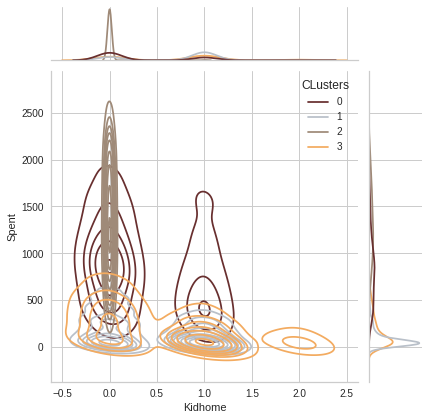

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

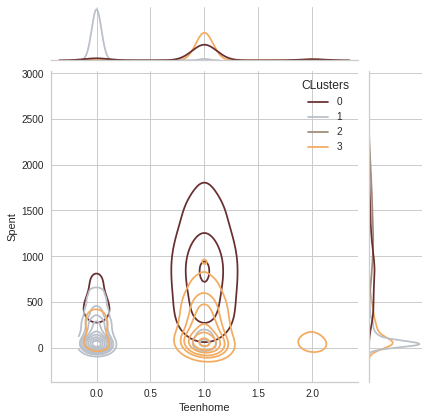

<Figure size 576x396 with 0 Axes>

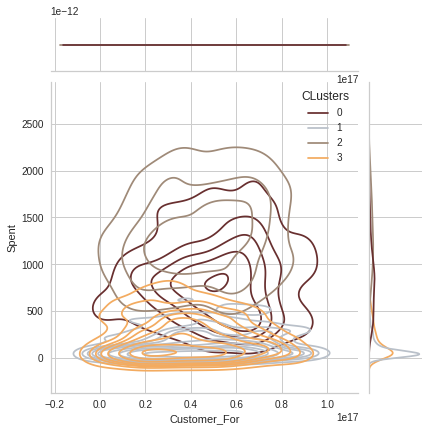

<Figure size 576x396 with 0 Axes>

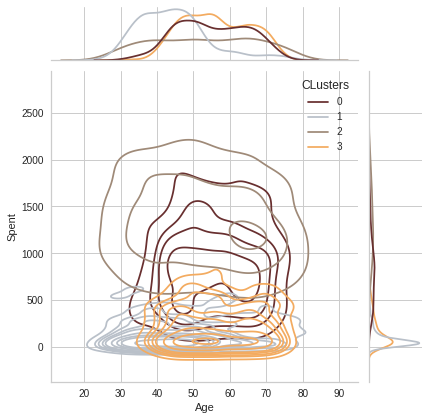

<Figure size 576x396 with 0 Axes>

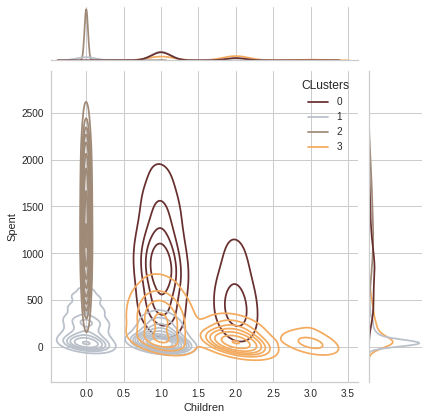

<Figure size 576x396 with 0 Axes>

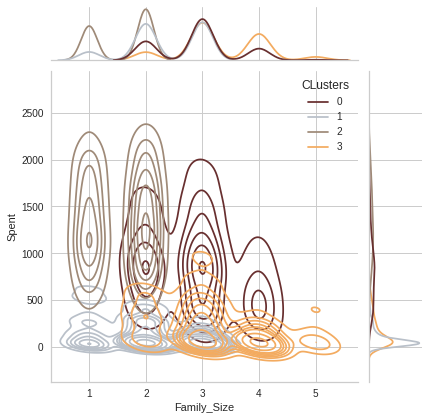

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

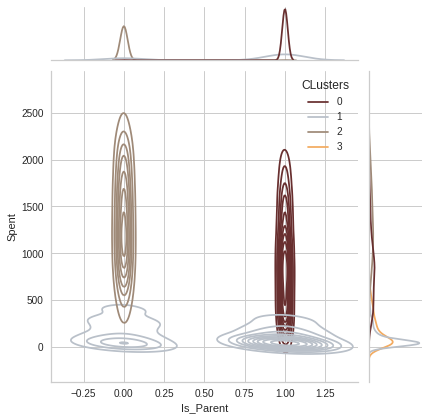

<Figure size 576x396 with 0 Axes>

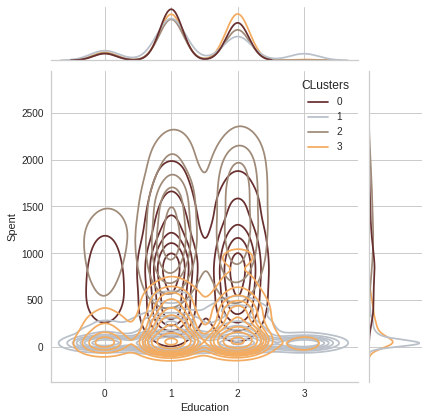

<Figure size 576x396 with 0 Axes>

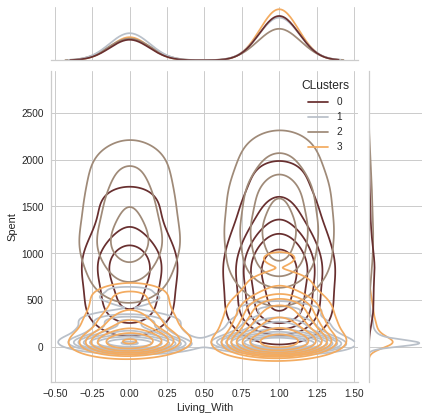

In [82]:
Personal=["Kidhome","Teenhome","Customer_For","Age","Children","Family_Size","Is_Parent","Education","Living_With"]

for i in Personal:
  plt.figure()
  sns.jointplot(x=df_cust[i],y=df_cust['Spent'],hue=df_cust["CLusters"],kind='kde',palette=pal)
  plt.show()